# Multiple Regression


Multiple regression analysis is an extension of linear regression where, instead of just having one independent variable (IV), we have two or more independent variables. When fitting a multiple regression model we are assessing the relationship between a linear combination of the IVs on a scale dependent variable (DV). With simple linear regression we were able to plot the relationship between our IV (x-axis variable) and our DV (y-axis variable) using the cartesian coordinate plane. once we have more than two IVs in a multiple regression model it becomes very difficult to visualise as we would have a plot with greater than three dimensions, however, we can still mathematically fit the model and work out the respective coefficients (slopes) for the different IVs. We can also use the output from a multiple regression model to assess the relative importance of the different IVs as predictors of scores on the DV. 

Recall that the equation for linear regression was derived from the algebraic equation for a straight line. Where a score on the DV is a function of the intercept (the offset point where the regression line crosses the y-axis when 0 is inputted for the x (IV) variable) plus the slope of the regression line multipled by the IV score: 

- DV score = intercept + slope * IV score
- y = ${\alpha}$ + ${\beta}$ * x

With multiple regression this equation is extended by simply adding more IVs to the right hand side of the equation. Each additional IV will have its own slope relative to the DV. Below is an example with three IVs:

- DV score = intercept + slope1 * IV1 score + slope2 * IV2 score + slope3 * IV3 score
- y = ${\alpha}$ + ${\beta}$1 * x1 + ${\beta}$2 * x2 + ${\beta}$3 * x3

In this notebook I will run a multiple regression analysis to predict socres on a DV using two scale IVs. I will use the statsmodels software library to achieve this. Statsmodels allows us to fit regression models using formulas from the R programming language that closely match the format of the regression equation above and are intuitively easy to understand. 

In [1]:
# Importing key software libraries.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
# Importing a dataset to use for the analysis. 

df = pd.read_csv("R1.csv")

df.head()

,books,attend,grade
0,0,9,45
1,1,15,57
2,0,10,45
3,2,16,51
4,4,10,65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   books   40 non-null     int64
 1   attend  40 non-null     int64
 2   grade   40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


We can see that this is a small dataset consisting of observations from 40 participants on a university course recording how many books they read, how many classes they attended, and the grade for the course. All three variables are integer type variables as they are measured on a discrete scale, as such they are suitable for a multiple regression analysis. 

I will fit a multiple regression model to this data to see if student's grades (DV score) can be predicted by their attendance of classes (IV1) and the number of textbooks they have read (IV2). The model will also allow us to assess which of these IVs is the best predictor of grade achieved. 

In [4]:
# Fitting a multiple regression model using statsmodels. 
# Note that the formula specification uses the tilda (~) character to separate the DV and IVs

mod_1 = smf.ols(formula = "grade ~ attend + books", data = df).fit()

mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     9.059
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           0.000628
Time:                        14:16:17   Log-Likelihood:                -160.91
No. Observations:                  40   AIC:                             327.8
Df Residuals:                      37   BIC:                             332.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3792      7.745      4.827      0.000      21.687      53.071
attend         1.2835      0.587      2.187      0.035       0.094       2.473
books          4.0369      1.753      2.303      0.027       0.485       7.589
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.427
Skew:                           0.221   Prob(JB):                        0.490
Kurtosis:                       2.187   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above output shows that the regression model is significant. The F-value associated with the model is significant indicating that fitting this model is a better way to predict scores on the DV than just using the mean DV value. 

F(2,37) = 9.06, p < 0.001

In the model, participant’s predicted test grade was equal to: grade =  37.38 + 4.04*(books) + 1.28*(attendance).
Using the intercept and coefficients for our model we can input different values for the IVs (books read and classes attended) to get a predicted grade for a student that has read any given number of books and attended any number of classes. 

We can summarise the result of this model as: Participants test grade increased 4.04 points for each book read and 1.28 points for each class attended.  Positive changes in test grade were associated with more books read and more frequent attendance.

The R-squared value for the model captures the model fit. This gives us some measure of how much variability in scores on the DV is accounted for by changes in scores on the IV. For this model R-squared was 0.33, indicating about 33% of variability in scores on the DV could be accounted for by changes in scores on the IVs. Using canned rules-of-thumb for effect sizes we would consider this a medium sized effect. This suggest that we have a reasonably good model for predicting grades using these two variables, although there is still a lot of variability unaccounted for that will be explained by other vairables that we have not measured or included in the model. 

We can also see from the associated t-tests for each IV whether they were significant predictors in the model. In this case, both IVs were significant and contributed significantly to the prediction of scores on the DV. Attendance: t(37) = 2.19, p = 0.04; Books: t(37) = 2.30, p = 0.03. 

One issue with the above model is that, although both IVs were significant, we cannot assess their relative importance as predictors of the DV. We cannot use the unstandardised ${\beta}$ coefficients to estimate this as the size of each coefficient will be influenced by the scale it was measured on. So, an IV could have a larger unstandarised ${\beta}$ coefficient but be making a smaller contribution to the model as a predictor of the DV. 

There are a couple of ways we can assess the relative importance of the different IVs in the model. One way is to run a similar multiple regression analysis using the pingouin software library and set a parameter of the model, called relimp, equal to True. Doing this will partition the R-squared value for the model into the relative contribution made up of each IV. This will also give the percentage of the R-squared value contributed by each IV. 

A second approach to assess the relative importance of different IVs is to standarise the variables in the dataframe prior to running the multiple regression analysis in statsmodels. I will demonstrate both of these methods in the below cells.  


### Assessing the relative importance of predictor IVs using pingouin

In [5]:
# Running regression analysis in Pingouin to obtain relative importance (relimp) of individual IVs. 

mod_2 = pg.linear_regression(df[['attend', 'books']], df['grade'], relimp = True)

mod_2

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,37.379185,7.744564,4.826506,0.000024,0.328712,0.292426,21.687207,53.071163,NaN,NaN
1,attend,1.283477,0.586964,2.186636,0.035168,0.328712,0.292426,0.094175,2.472780,0.159626,48.561
2,books,4.036893,1.753049,2.302784,0.027015,0.328712,0.292426,0.484878,7.588907,0.169086,51.439


Above is the coefficients table for the model produced by the pingouin linear_regression method. This returns the same values for the intercept and coefficients for the IVs as in the previous model fitted using statsmodels. Some additional information has been requested in this table, this is the relative importance (relimp) of each IV. As stated above, this is the proportion of the R-squared variance explained in the DV that is attributable to each IV. We can see from the relimp column that, of the approximately 33% of variance explained by the model, about 16% (0.159) is explained by attendance and about 17% (0.169) is explained by books read. In this case both IVs seem to be contributing fairly equally to the model as predictors. The relimp_perc column gives these relative contributions stated as a percentage of the total R-squared value. Here we can see that books accounts for slightly more variance explained (51.5%) compared to attendance (48.5%). 

### Standardising variables to obtain a standardized regression model

An alternative way to assess the contribution of individual predictors to the multiple regression model is to first standardise the variables used in the model and then run the analysis on the standardised data. This will ensure that all variables are recorded on the same scale and can be directly compared by looking at their coefficients. 

Standardised regression coefficients provide an easy way to estimate effect size and contribution to the model that is independent of the units the variable was originally measured in. Here I will use scipy stats to convert the variables to z-scores and then create a pandas series object. I will create two new objects, one for the DV and one for the IVs, and then run the analysis again using statsmodels. 

In [6]:
# Importing scipy and using the z-score method. I have wrapped this inside a pandas Series so that the object created is
# a dataframe containing only one variable. 

import scipy.stats as stats

grade_norm = pd.Series(stats.zscore(df['grade']))
grade_norm.head()

0   -1.124557
1   -0.397081
2   -1.124557
3   -0.760819
4    0.087903
Name: grade, dtype: float64

In [7]:
# Here I am converting the IVs to standardised z-scores. 
# First, creating a new object containing only the IVs (books and attend).
# Converting that object (ivs_norm) to a dataframe containing the standardised IVs.
# Next adding a constant to the dataframe. This will be all values of 1 to act as the coefficient for the intercept.
# Then adding a check to see the mean and standard deviation for the standardised IVs. 
# If standardisation has work each IV should have a mean of 0 and standard deviation of 1. 
# The constant will have a mean of 1 and standard deviation of 0 as all values of that variable are the same. 

ivs_norm = df[['attend', 'books']]
ivs_norm = pd.DataFrame(stats.zscore(ivs_norm))
ivs_norm = sm.add_constant(ivs_norm)

check = pd.concat([round(ivs_norm.mean(axis=0), 5), round(ivs_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
attend,0.0,1.0
books,0.0,1.0


The standardisation appears to have worked and the IVs now have a mean of 0 and sd of 1. Next I will fit the mutliple regression model again. 

In [8]:
# Standardised multiple regression model. 

mod_std = sm.OLS(grade_norm, ivs_norm).fit()

mod_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     9.059
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           0.000628
Time:                        14:35:15   Log-Likelihood:                -48.786
No. Observations:                  40   AIC:                             103.6
Df Residuals:                      37   BIC:                             108.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-16      0.135   1.03e-15      1.000      -0.273       0.273
attend         0.3286      0.150      2.187      0.035       0.024       0.633
books          0.3461      0.150      2.303      0.027       0.042       0.651
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.427
Skew:                           0.221   Prob(JB):                        0.490
Kurtosis:                       2.187   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above output we see that the model returns the same result in terms of signficance (F(2,37) = 9.06, p < 0.001) and fit (R-squared = 0.33). However, on this occasion we see that the coefficients have changed and are in standardised units. Attendance has a coefficient of 0.33 and books has a coefficient of 0.35. This tells us that every one standard deviation increase in attendance results in an increase in grade of about 0.33 standard deviations, and every one standard deviation increase in books produces about a 0.34 standard deviation increase in grade. Both IVs are still significant predictors (Attendance: t(37) = 2.19, p = 0.04; Books: t(37) = 2.30, p = 0.03) and, as we observed when checking the relative importance of these two variables, are both contributing fairly equally to the variance explained in DVs scores.

A good way to visualise the relative contribution of our different IVs to the model is by using a tornado diagram to plot the standardised regression coefficients. 

<AxesSubplot:>

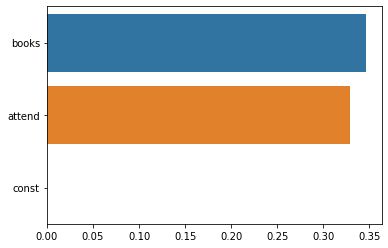

In [9]:

coeff = mod_std.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h')

The above plot confirms what we already though to be the case when inspecting the standardised coefficients in the model output, that both books and attendance contribute fairly evenly to predicting grade scores. Tornado plots like this are very useful when we have lot sof IVs in our model, in which case we can see their relative weighting. 

## Summary:

- Multiple regression extends the linear regression model by allowing us to add more IVs.
- Multiple regression analysis can be conducted using statsmodels and this allows us to use R style formula specifications.
- Some or all of our IVs may be contributing to a regression model that is significant and can be used to predict scores on the DV.
- We can assess whether individual IVs are significant predictors by checking their associated t-test.
- To assess the relative contribution of different IVs as predictors in the model we can use pingouin to assess their relative importance by partitioning their contribution to the variance explained (R-squared).
- Alternatively, we can standardise our variables of interest so they are all measured on the same scale and then fit the regression model using the standardised versions of the variables. This allows us to directly compare different IVs and their relationship to the DV.